<a href="https://colab.research.google.com/github/TichaonaDamis/Missing-Value-Analysis-and-Imputation-using-Python/blob/main/Template%20-%20Missing%20Value%20Analysis%20and%20Imputation%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Missing Value Imputation</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Start by subsetting for your team's region.

In [36]:
# cloning GitHub Repo
!git clone https://github.com/TichaonaDamis/Missing-Value-Analysis-and-Imputation-using-Python.git


# changing directory
import os
repo_name = '/content/Missing-Value-Analysis-and-Imputation-using-Python'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

fatal: destination path 'Missing-Value-Analysis-and-Imputation-using-Python' already exists and is not an empty directory.
Current working directory changed to: /content/Missing-Value-Analysis-and-Imputation-using-Python


In [37]:
# package imports
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # enhanced data visualization
import warnings                 # warnings


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# data import
world_df = pd.read_excel(io = "./worldbank.xlsx")


# subesetting team's region
team6 = world_df[ world_df["Region"] == 'Northern Asia']


# checking results
team6.head(n = 5)

,Obs,Country/Territory,Code,Region,Adolescent Fertility Rate,Youth Literacy Rate,Toursim (Digital Demand),Technology Exports,Fertility Rate,Population,CO2 Emissions,Working Population,International Tourism,GDP PPP,Primary School Enrollment Rate,Life Expectancy,Renewable Energy Score,Population (Urban %),Internet Usage (%),Trade (% of GDP),GCI,Feel Unsafe In Home,Crime Victims,Population (Rural %),Population ages 0-14 (% of total population),Data Count
15,16.0,Bangladesh,BGD,Northern Asia,73.179,94.4618,1.44813,9.360770e+07,2.163,1.735620e+08,0.510648,113705000.0,1.16069,677.07,94.9566,72.00,26.7857,41.230,38.9174,26.7781,3.91,12.636,4.23729,58.770,27.9889,21.0
22,23.0,Bhutan,BTN,Northern Asia,9.364,98.0000,NaN,5.857500e+04,1.462,7.915240e+05,1.340050,574618.0,4.20707,NaN,90.0655,69.83,0.0000,45.000,NaN,81.5645,4.10,NaN,NaN,55.000,20.9094,16.0
40,41.0,China,CHN,Northern Asia,5.227,99.8100,22.39810,8.250450e+11,0.999,1.408980e+09,7.756140,976799000.0,3.85838,22462.50,89.3489,75.99,58.4101,65.544,75.6113,37.1984,5.00,NaN,4.88130,34.456,16.0078,20.0
85,86.0,Hong Kong,HKG,Northern Asia,1.120,NaN,NaN,3.691640e+11,0.751,7.524100e+06,NaN,5027980.0,3.88507,427.14,96.2657,84.28,0.0000,100.000,NaN,359.4020,5.53,NaN,6.00545,0.000,10.5078,16.0
88,89.0,India,IND,Northern Asia,14.060,96.5359,17.90700,4.094240e+10,1.975,1.450940e+09,1.576090,989967000.0,3.19999,9338.12,97.7377,68.35,67.7852,36.867,46.3100,44.6711,4.59,NaN,NaN,63.133,24.6239,19.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Missing Value Proportions</h3><br>
<strong>a)</strong> Write a code that outputs the proportion of missing values for each feature (column) in your Hult region. Round the missing value proportions to four decimal places and sort them in descending order.

In [38]:
# missing value proportions
team6.isna().sum().round(4).sort_values(ascending=False)

,0
Feel Unsafe In Home,13
Toursim (Digital Demand),7
Internet Usage (%),7
Crime Victims,7
GDP PPP,6
GCI,5
Life Expectancy,5
International Tourism,3
Technology Exports,3
Youth Literacy Rate,3


In [41]:
team6.isna().sum().round(8).sort_values(ascending=False)

,0
Feel Unsafe In Home,13
Toursim (Digital Demand),7
Internet Usage (%),7
Crime Victims,7
GDP PPP,6
GCI,5
Life Expectancy,5
International Tourism,3
Technology Exports,3
Youth Literacy Rate,3


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> Complete the code below to store the missing value proportions as a DataFrame. Then, complete the loop to group features based on their proportions of missing values.

In [42]:
# storing above as a DataFrame
missing_df = ( team6.isnull()
                    .mean()
                    .round(decimals=4)
                    .sort_values(ascending=False)
)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]


# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif 0.67 <= missing_df.loc[index, 'mv_proportion'] < 1.00:
        mv_hi.append(missing_df.loc[index, 'feature'])


    # features with [0.33, 0.67) mv proportion
    elif 0.33 <= missing_df.loc[index, 'mv_proportion'] < 0.67:
        mv_mid.append(missing_df.loc[index, 'feature'])


    # features with (0.0, 0.33) mv proportion
    elif 0.0 < missing_df.loc[index, 'mv_proportion'] < 0.33:
        mv_low.append(missing_df.loc[index, 'feature'])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.67, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.33, 0.67) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.33) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
[]

 --------------
| [0.67, 1.00) |
 --------------
[]

 -------------
|[0.33, 0.67) |
 -------------
['Feel Unsafe In Home', 'Toursim (Digital Demand)', 'Internet Usage (%)', 'Crime Victims']

 ------------
| (0.0, 0.33) |
 ------------
['GDP PPP', 'GCI', 'Life Expectancy', 'International Tourism', 'Technology Exports', 'Youth Literacy Rate', 'Primary School Enrollment Rate', 'CO2 Emissions', 'Trade (% of GDP)', 'Working Population', 'Adolescent Fertility Rate', 'Fertility Rate', 'Population', 'Population (Urban %)', 'Population ages 0-14 (% of total population)', 'Population (Rural %)']



Need to adjust the thresholds in the code about since some group has no features: Mv_max amd Mv_high by changing the Percentages ranges from the for loop()

In [43]:
# storing above as a DataFrame
missing_df = ( team6.isnull()
                    .mean()
                    .round(decimals=4)
                    .sort_values(ascending=False)
)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]


# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif 0.50<= missing_df.loc[index, 'mv_proportion'] < 1.00:
        mv_hi.append(missing_df.loc[index, 'feature'])


    # features with [0.33, 0.67) mv proportion
    elif 0.30 <= missing_df.loc[index, 'mv_proportion'] < 0.50:
        mv_mid.append(missing_df.loc[index, 'feature'])


    # features with (0.0, 0.33) mv proportion
    elif 0.0 < missing_df.loc[index, 'mv_proportion'] < 0.30:
        mv_low.append(missing_df.loc[index, 'feature'])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.50, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.30, 0.50) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.30) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
[]

 --------------
| [0.50, 1.00) |
 --------------
['Feel Unsafe In Home']

 -------------
|[0.30, 0.50) |
 -------------
['Toursim (Digital Demand)', 'Internet Usage (%)', 'Crime Victims', 'GDP PPP']

 ------------
| (0.0, 0.30) |
 ------------
['GCI', 'Life Expectancy', 'International Tourism', 'Technology Exports', 'Youth Literacy Rate', 'Primary School Enrollment Rate', 'CO2 Emissions', 'Trade (% of GDP)', 'Working Population', 'Adolescent Fertility Rate', 'Fertility Rate', 'Population', 'Population (Urban %)', 'Population ages 0-14 (% of total population)', 'Population (Rural %)']



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Develop Missing Value Rationales</h3><br>
Choose one feature from each of the three missing value groups (<em>mv_hi</em>, <em>mv_mid</em>, and <em>mv_low</em>). Note that you may adjust the thresholds in the code about if a group has no features. Investigate your chosen features and develop a rationale for why missing values are present. This will likely require an investigation of countries outside of your Hult region, as well as additional research. (minimum of five sentences and one relevant source (cited in A.P.A format) per missing value group).
<br><br>
<strong>a)</strong> Investigate and develop a rationale for the feature in the <strong>mv_hi</strong> group. Note that

In [44]:
##Investigate a feature in the  mv_hi group

# Choose a feature from mv_hi
feature_hi = "Feel Unsafe In Home"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)

# Optional: display rows with missing values
missing_rows = team6[team6[feature_hi].isnull()]
print(f"\nRows with missing {feature_hi}:")
print(missing_rows)

Feature: Feel Unsafe In Home
Missing values: 13 (65.00%)

Descriptive statistics for available values:
count     7.000000
mean      7.520903
std       7.834605
min       0.000000
25%       2.663510
50%       5.365200
75%       9.642700
max      22.668700
Name: Feel Unsafe In Home, dtype: float64

Rows with missing Feel Unsafe In Home:
       Obs           Country/Territory Code         Region  Adolescent Fertility Rate  Youth Literacy Rate  Toursim (Digital Demand)  Technology Exports  Fertility Rate    Population  CO2 Emissions  Working Population  International Tourism   GDP PPP  Primary School Enrollment Rate  Life Expectancy  Renewable Energy Score  Population (Urban %)  Internet Usage (%)  Trade (% of GDP)   GCI  Feel Unsafe In Home  Crime Victims  Population (Rural %)  Population ages 0-14 (% of total population)  Data Count
22    23.0                      Bhutan  BTN  Northern Asia                      9.364              98.0000                       NaN        5.857500e+04     

Domestic and intimate partner violence in Northern Asia is widespread but heavily under‑reported due to stigma, norms, and data gaps.
Around 8% of ever‑partnered women 15–49 in Eastern and South‑Eastern Asia report partner violence in the past year, below the global average but still millions affected.Survey quality and coverage vary widely, and conflict or militarization in some areas make safe, representative data collection difficult as a result data is generalised using secondary data.From <https://genderdata.worldbank.org/en/indicator/sg-vaw-1549-zs>




<strong>b)</strong> Investigate and develop a rationale for the feature in the <strong>mv_mid</strong> group.

In [45]:
##Investigate a feature in the mv_mid group

# Choose a feature from mv_hi (replace 0 with the index of the feature you want)
feature_hi = "Internet Usage (%)"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)

# Optional: display rows with missing values
missing_rows = team6[team6[feature_hi].isnull()]
print(f"\nRows with missing {feature_hi}:")
print(missing_rows)

Feature: Internet Usage (%)
Missing values: 7 (35.00%)

Descriptive statistics for available values:
count    13.000000
mean     62.578408
std      26.511808
min      21.037200
25%      44.453100
50%      75.611300
75%      81.606800
max      97.398600
Name: Internet Usage (%), dtype: float64

Rows with missing Internet Usage (%):
       Obs           Country/Territory Code         Region  Adolescent Fertility Rate  Youth Literacy Rate  Toursim (Digital Demand)  Technology Exports  Fertility Rate  Population  CO2 Emissions  Working Population  International Tourism  GDP PPP  Primary School Enrollment Rate  Life Expectancy  Renewable Energy Score  Population (Urban %)  Internet Usage (%)  Trade (% of GDP)   GCI  Feel Unsafe In Home  Crime Victims  Population (Rural %)  Population ages 0-14 (% of total population)  Data Count
22    23.0                      Bhutan  BTN  Northern Asia                      9.364              98.0000                       NaN        5.857500e+04           1

Large parts of Northern Asia are remote, sparsely populated, and climatically harsh, making it expensive to build and maintain telecom networks; connectivity is often limited or unstable.https://www.unapcict.org/sites/default/files/2021-03/Digital%20Trends%20in%20Asia%20Pacific%202021.pdf
Operators’ administrative data and household surveys can significantly under‑cover rural and remote communities, so national statistics on Internet users are incomplete or unreliable.https://www.adb.org/news/digitalization-can-reduce-persistent-inequality-asia-and-pacific




<strong>c)</strong> Investigate and develop a rationale for the feature in the <strong>mv_low</strong> group.

In [46]:
##Investigate a feature in the mv_hi group

# Choose a feature from mv_hi (replace 0 with the index of the feature you want)
feature_hi = "Youth Literacy Rate"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)

# Optional: display rows with missing values
missing_rows = team6[team6[feature_hi].isnull()]
print(f"\nRows with missing {feature_hi}:")
print(missing_rows)

Feature: Youth Literacy Rate
Missing values: 3 (15.00%)

Descriptive statistics for available values:
count     17.000000
mean      96.870076
std        6.532254
min       72.703600
25%       96.535900
50%       99.074300
75%       99.800000
max      100.000000
Name: Youth Literacy Rate, dtype: float64

Rows with missing Youth Literacy Rate:
       Obs           Country/Territory Code         Region  Adolescent Fertility Rate  Youth Literacy Rate  Toursim (Digital Demand)  Technology Exports  Fertility Rate   Population  CO2 Emissions  Working Population  International Tourism  GDP PPP  Primary School Enrollment Rate  Life Expectancy  Renewable Energy Score  Population (Urban %)  Internet Usage (%)  Trade (% of GDP)   GCI  Feel Unsafe In Home  Crime Victims  Population (Rural %)  Population ages 0-14 (% of total population)  Data Count
85    86.0                   Hong Kong  HKG  Northern Asia                      1.120                  NaN                       NaN        3.691640e+11

It is difficult to measure youth literacy in Northern Asia because education data systems and surveys often do not consistently test whether 15–24‑year‑olds can read and write with understanding. Reported literacy can be biased upward when countries rely on self‑reported ability instead of direct assessments, and changes from self‑report to test‑based measures create breaks and gaps in the series. Multilingual contexts and the lack of validated tests in minority or indigenous languages mean some groups are not properly assessed or excluded altogether. Remote, sparsely populated, or conflict‑affected areas are hard and costly to survey, so they are frequently under‑sampled, while politically sensitive low literacy results may be delayed, suppressed, or not reported internationally. Together with evolving international methodologies, these factors leave many Northern Asian countries with data only for a few census or survey years, producing large missing stretches in the World Bank youth literacy time series.





<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Distribution Analysis</h3><br>
Complete the code below for the three features you selected. This will render overlayed histograms so that you may compare the regional and world-wide distributions of your features, giving you better ideas as to which imputation strategies to adopt.

In [ ]:
# sns.histplot documentation
help(sns.histplot)

<br>

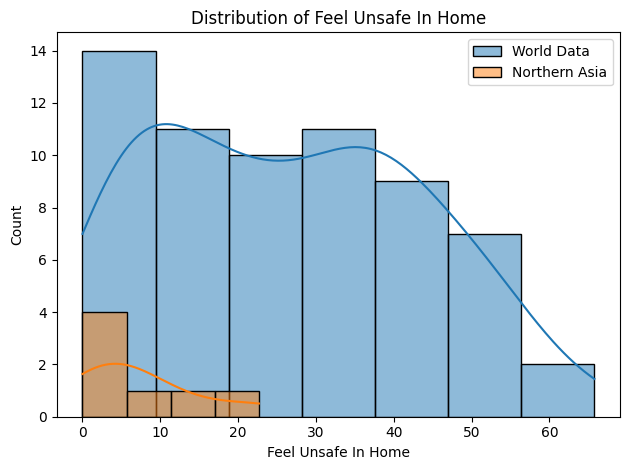

In [49]:
# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

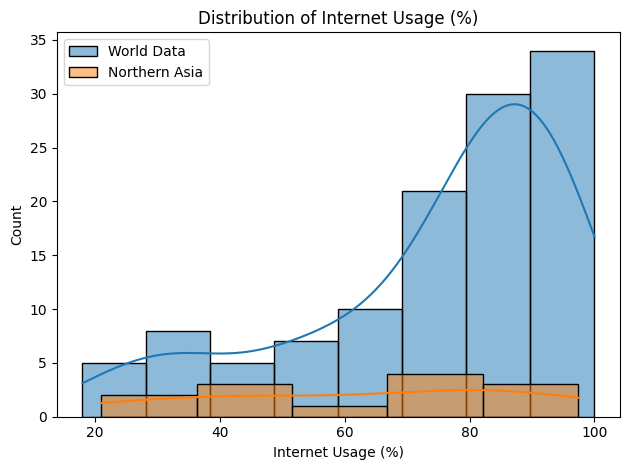

In [54]:
# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')

# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')

# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

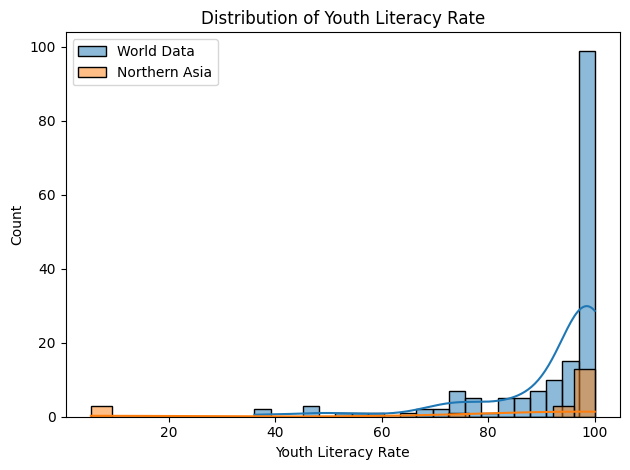

In [55]:
# histogram (full data)
sns.histplot(data = world_df,
          x     = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')

# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Missing Value Imputation</h3><br>
Develop and code an imputation strategy for each of your chosen features. Remember, missing value imputation should minimally impact a feature's original distribution. Below are the available strategies:

* Impute using a <strong>global</strong> (full dataset) descriptive statistic (mean, min, max, etc.).
* Impute using a <strong>local</strong> (your Hult region) descriptive statistic (mean, min, max, etc.).
* Drop the feature from the full dataset.

Below is the help documentation for two methods that can be used to address this challenge.

In [ ]:
# documentation for the .fillna() method
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.generic:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame | None' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool_t' = False, limit: 'int | None' = None, downcast: 'dict | None | lib.NoDefault' = <no_default>) -> 'Self | None'
    Fill NA/NaN values using the specified method.

    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:

        * ffill: propagate last valid observation forward to next valid.
        * backfill / bfill: use next va

<br>

In [ ]:
# documentation for the .drop() method
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>a)</strong> What is your strategy for the feature in the <strong>mv_hi</strong> group? (minimum of two sentences)

Missing values in Feeling Safe were successfully imputed using the median value (5.3652), resulting in zero remaining missing observations.

In [66]:
## code Step 4a here ##
# Step 4a: Feel Unsafe In Home

feature_hi = "Feel Unsafe In Home"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())

Median used: 5.3652
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> What is your strategy for the feature in the <strong>mv_mid</strong> group? (minimum of two sentences)

Missing values in Internet Usage (%) were successfully imputed using the local median value (5.3652), resulting in zero remaining missing observations.

In [64]:
## code Step 4a here ##
# Step 4b: Internet Usage (%)

feature_hi = "Internet Usage (%)"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())

Median used: 75.6113
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c)</strong> What is your strategy for the feature in the <strong>mv_low</strong> group? (minimum of two sentences)

Missing values in Youth Literacy Rate were imputed using the local median (98.8712), resulting in zero remaining missing values. This preserves the feature’s distribution while reflecting the high Youth Literacy rate typical of Northern Asia.

In [65]:
## code Step 4c here ##

# Step 4c: Youth Literacy Rate

feature_hi = "Youth Literacy Rate"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())


Median used: 98.8712
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Checking Results</h3><br>
After imputing, complete and run the histogram codes below to ensure the original distribution of each feature was not severely impacted. Note that you may get an error if you dropped any of your chosen features from the dataset (this will not impact your grade).

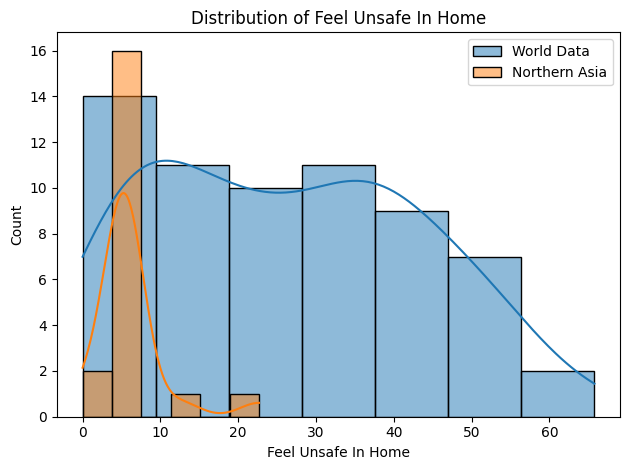

In [67]:
## feature from the mv_hi group ##
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

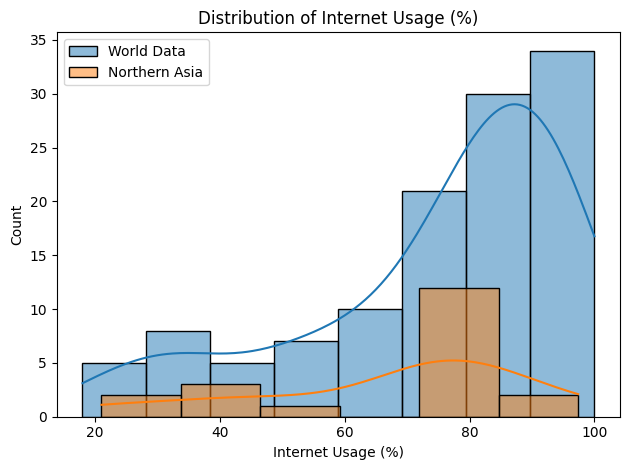

In [68]:
## feature from the mv_mid group ##

sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

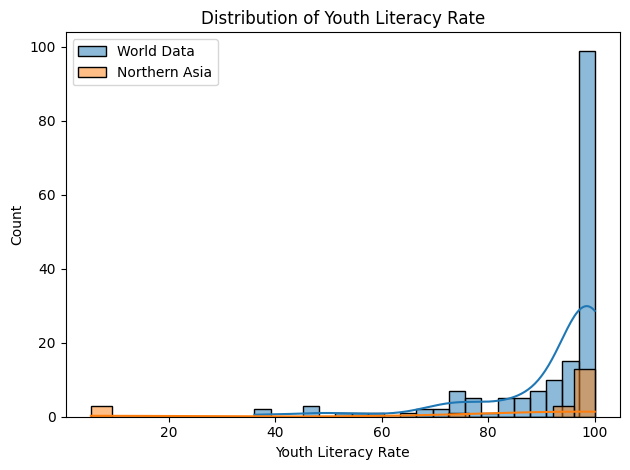

In [69]:
## feature from the mv_low group ##
sns.histplot(data = world_df,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Advanced Imputation</h3><br>
Complete the code below by inputting your Hult region and your chosen features that. Then, run the following codes to implement a KNN imputer. This is an algorithm we will discuss later in our program. For now, note that KNN makes predictions based on similarities from other observations (rows).
<br><br>
Note: Features with 100% missing values will not work in the code below.

In [70]:
# new methods from sklearn!
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# reimporting the data
world_df = pd.read_excel(io = "./worldbank.xlsx")


# subesetting Hult region
team6 = world_df[ world_df["Region"] == 'Northern Asia']


# selecting features
features = ['Feel Unsafe In Home',
            'Internet Usage (%)',
            'Youth Literacy Rate']

<br>

In [71]:
## Scaling and Imputing (advanced)

# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X = team6[features])


# imputing with KNN
imputer = KNNImputer(n_neighbors = 5)
imputed_scaled_data = imputer.fit_transform(scaled_data)


# reversing the scaling
imputed_data = scaler.inverse_transform(imputed_scaled_data)

# attaching results to team_df
team6[features] = imputed_data

team6[features]

,Feel Unsafe In Home,Internet Usage (%),Youth Literacy Rate
15,1.263600e+01,38.917400,94.461800
22,3.468324e+00,54.450060,98.000000
40,4.665644e+00,75.611300,99.810000
85,7.520903e+00,62.578408,96.870076
88,5.727666e+00,46.310000,96.535900
97,9.731718e+00,82.914100,99.716840
103,5.365200e+00,77.920400,99.700000
113,3.987730e+00,71.236400,99.790000
116,4.665644e+00,97.398600,95.563900
117,-8.881784e-16,75.086040,99.430000


<br>

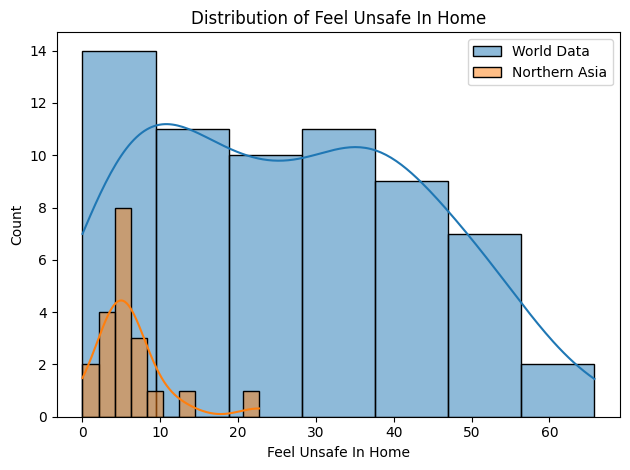

In [72]:
## feature from the mv_hi group ##
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

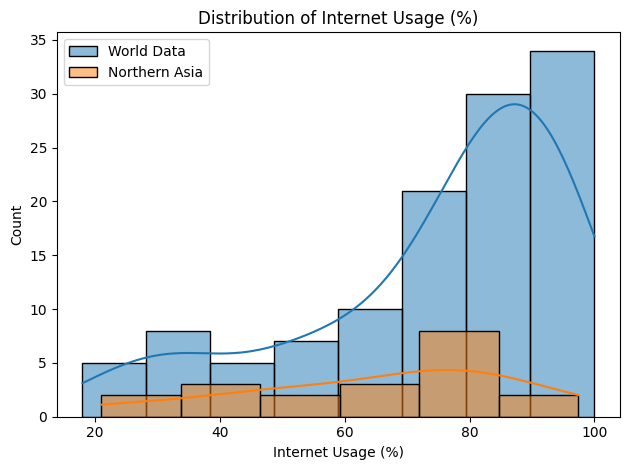

In [73]:
## feature from the mv_mid group ##
sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

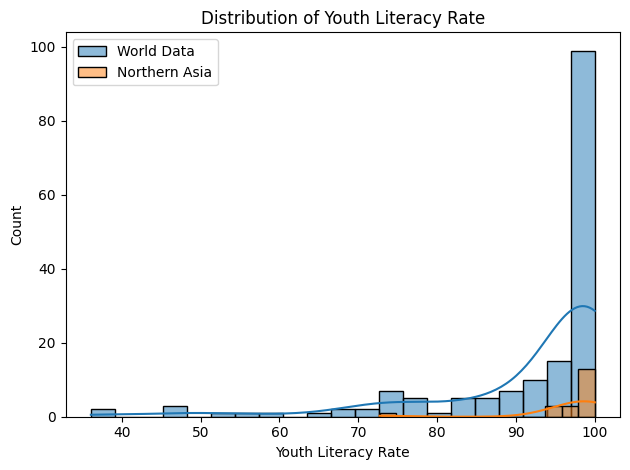

In [74]:
## feature from the mv_low group ##
sns.histplot(data = world_df,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 6: Reflection</h3><br>
Each imputation strategy has its advantages in certain situations.

* Impute using a global or local descriptive statistic.
1️⃣ Impute using a global or local descriptive statistic (mean, median, mode)

Imputation using a descriptive statistic is simple and quick, making it ideal for datasets with few missing values. Using the median is particularly useful for skewed data or survey-like variables, as it is less affected by outliers. Local statistics (e.g., median within a region) can capture subgroup-specific patterns, ensuring the imputed values are more representative of that subgroup than a global value would be.
* Impute using an algorithm such as KNN.
KNN imputation leverages the relationships among multiple features to estimate missing values, making it more accurate for datasets with complex dependencies between variables. Scaling features before applying KNN ensures that all variables contribute equally to distance calculations, avoiding dominance by features with larger ranges. This method is especially useful when preserving multivariate patterns is important, as it reduces bias compared to simple statistical imputation.
* Drop a feature from the dataset.
Dropping a feature is a valid option when the feature contains too many missing values or is not critical to the analysis. This strategy prevents introducing potentially inaccurate imputed values that could distort results. However, based on the region there was no need for me to drop features, as removing important variables can reduce the predictive power or interpretability of a model.

<em>Write your response to Step 6 here.</em>

<br>